In [11]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex3 import *
print("Setup Complete")

Setup Complete


In [45]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)
earthquakes.shape[0]

23412

In [46]:
earthquakes['Date'].dtype
earthquakes.shape[0]

23412

Once you have answered the question above, run the code cell below to get credit for your work.

In [12]:
# Check your answer (Run this code cell to receive credit!)
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The "Date" column in the `earthquakes` DataFrame does have dates.  The dtype is "object".

In [48]:
# Line below will give you a hint
earthquakes.shape[0]

23412

# 2) Convert our date columns to datetime

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year".  However, the entry at index 3378 follows a completely different pattern.  Run the code cell below to see this.

In [49]:
earthquakes.shape[0]


23412

This does appear to be an issue with data entry: ideally, all entries in the column have the same format.  We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.

In [17]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

Looks like there are two more rows that has a date in a different format.  Run the code cell below to obtain the indices corresponding to those rows and print the data.

indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

In [41]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
3378,02/23/1975,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,1975-02-23
7512,04/28/1985,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed,1985-04-28
20650,03/13/2011,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed,2011-03-13


Given all of this information, it's your turn to create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it.  

**Note**: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns.  Do not remove any rows from the dataset.

In [50]:
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes["date_parsed"] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")
 #Check your answer
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [26]:
# Lines below will give you a hint or solution code
#q2.hint()
#q2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Since there are only three rows with a fancy type, you might consider manually editing them. For instance, you can begin by setting `earthquakes.loc[3378, "Date"] = "02/23/1975"`.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

```

# 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [66]:
# try to get the day of the month from the date column
day_of_month_earthquakes =earthquakes['date_parsed'].dt.day

# Check your answer
q3.check()
day_of_month_earthquakes.shape[0]


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: date_parsed, Length: 23412, dtype: int64

In [52]:
# Lines below will give you a hint or solution code
#q3.hint()
#q3.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

```

# 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

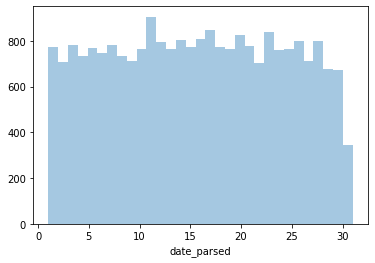

In [69]:
day_of_month_earthquakes=day_of_month_earthquakes.dropna()
sns.distplot(day_of_month_earthquakes, kde=False , bins=31)


In [72]:
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")